Importing all the libraries

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



Importing dataset using pandas library

In [39]:
dataset = pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [40]:
dataset.shape

(1156, 7)

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [42]:
dataset['PURPOSE'].fillna("NOT", inplace = True)

In [43]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], 
                                       errors = 'coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], 
                                     errors = 'coerce')


In [44]:
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['END_DATE']).hour

dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [45]:
dataset.dropna(inplace = True)

In [46]:
dataset.drop_duplicates(inplace = True)

In [47]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 175, 'STOP': 185, 'PURPOSE': 11, 'date': 291}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

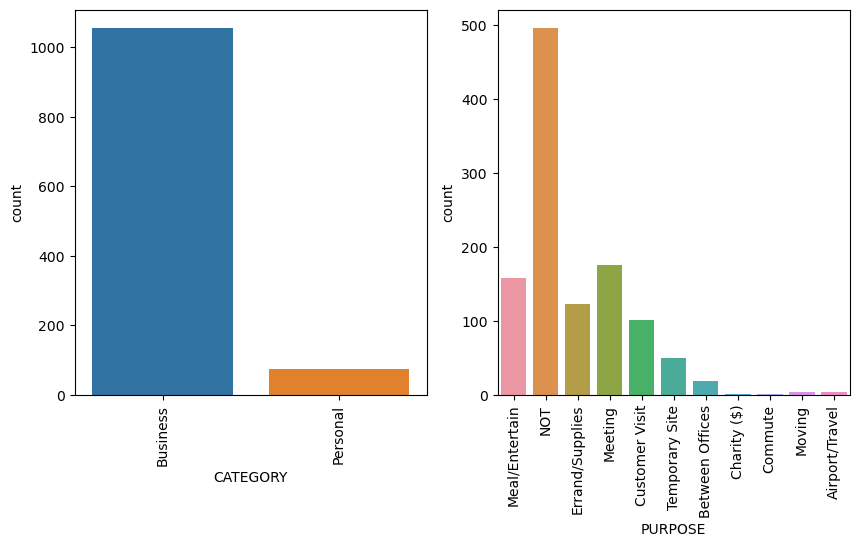

In [48]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data = dataset, x = 'CATEGORY')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data = dataset, x = 'PURPOSE')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

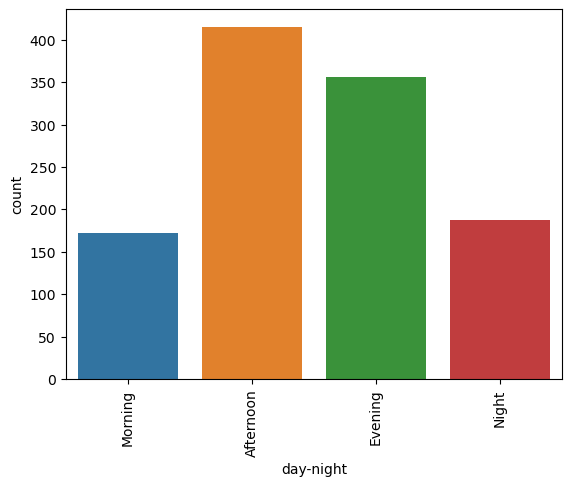

In [49]:
sns.countplot(data = dataset, x = 'day-night')
plt.xticks(rotation = 90)

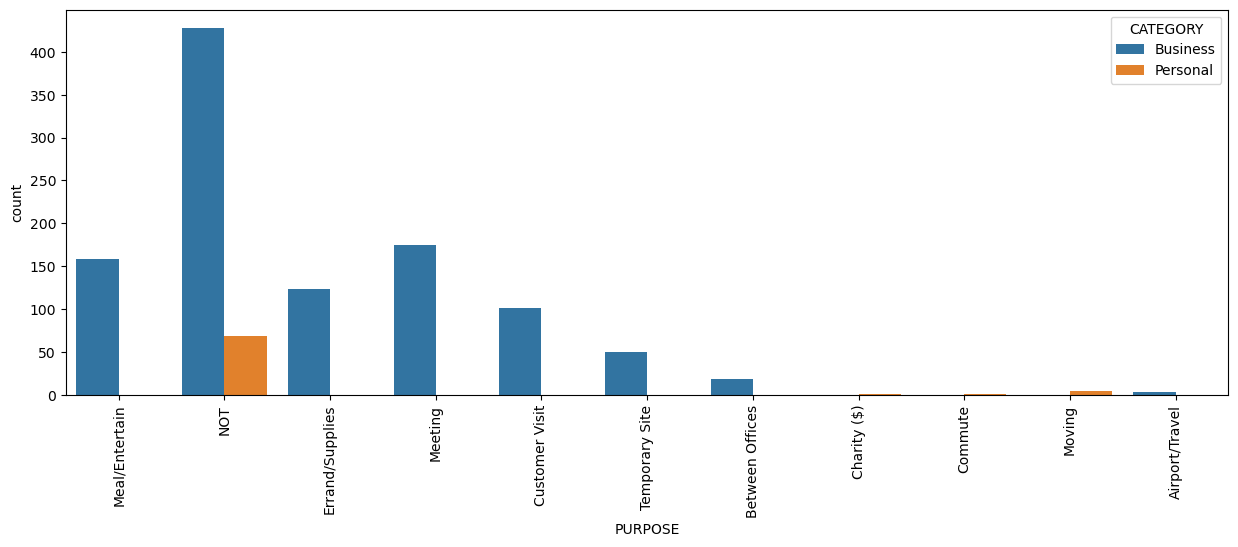

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(data=dataset, x = 'PURPOSE', hue = 'CATEGORY')
plt.xticks(rotation = 90)
plt.show()

In [82]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse = False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = dataset.drop(object_cols, axis = 1)
dataset = pd.concat([df_final, OH_cols], axis = 1)

KeyError: "None of [Index(['CATEGORY', 'PURPOSE'], dtype='object')] are in the [columns]"

In [79]:

from sklearn.preprocessing import OneHotEncoder

# Assuming dataset is already loaded

# Print column names to debug
print("Columns in dataset:", dataset.columns)

# Strip whitespace from column names if necessary
dataset.columns = dataset.columns.str.strip()

# Check if 'CATEGORY' and 'PURPOSE' are in the columns
if 'CATEGORY' in dataset.columns and 'PURPOSE' in dataset.columns:
    object_cols = ['CATEGORY', 'PURPOSE']
    OH_encoder = OneHotEncoder(sparse=False)
    
    # Apply one-hot encoding
    OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
    OH_cols.index = dataset.index
    OH_cols.columns = OH_encoder.get_feature_names_out(input_features=object_cols)
    
    # Drop original columns and concatenate the new one-hot encoded columns
    dataset = dataset.drop(object_cols, axis=1)
    dataset = pd.concat([dataset, OH_cols], axis=1)
    
    print("One-hot encoded columns added to dataset.")
else:
    print("One or both of the columns 'CATEGORY' and 'PURPOSE' are not in the dataset.")


Columns in dataset: Index(['START_DATE', 'END_DATE', 'START', 'STOP', 'MILES', 'date', 'time',
       'day-night', 'x0_Business', 'x0_Personal', 'x1_Airport/Travel',
       'x1_Between Offices', 'x1_Charity ($)', 'x1_Commute',
       'x1_Customer Visit', 'x1_Errand/Supplies', 'x1_Meal/Entertain',
       'x1_Meeting', 'x1_Moving', 'x1_NOT', 'x1_Temporary Site', 'MONTH',
       'DAY'],
      dtype='object')
One or both of the columns 'CATEGORY' and 'PURPOSE' are not in the dataset.


<AxesSubplot:>

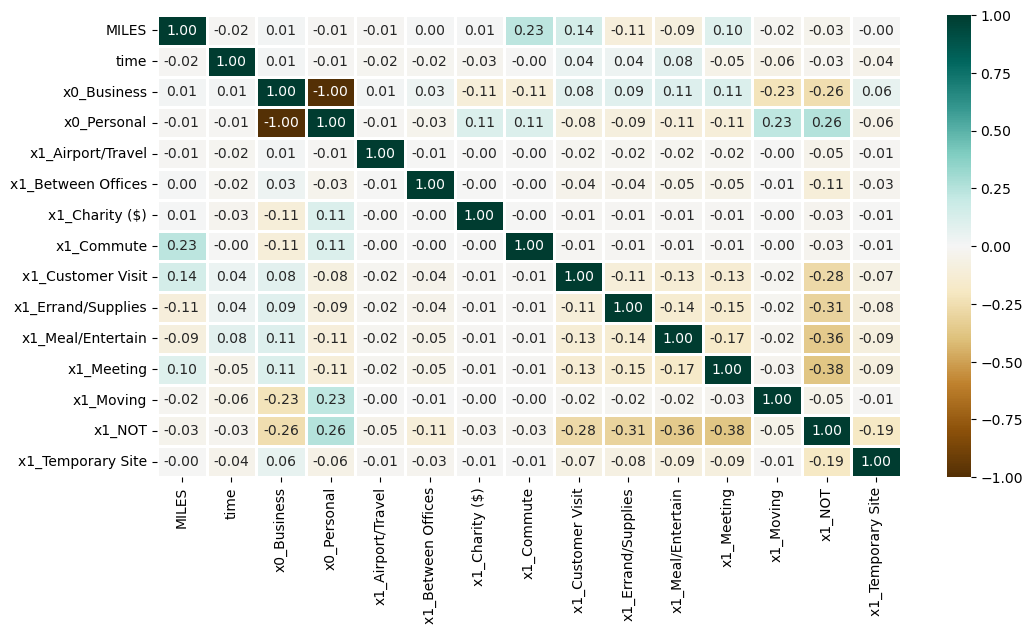

In [53]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(), cmap = 'BrBG', fmt = '.2f',
           linewidths = 2, annot = True)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

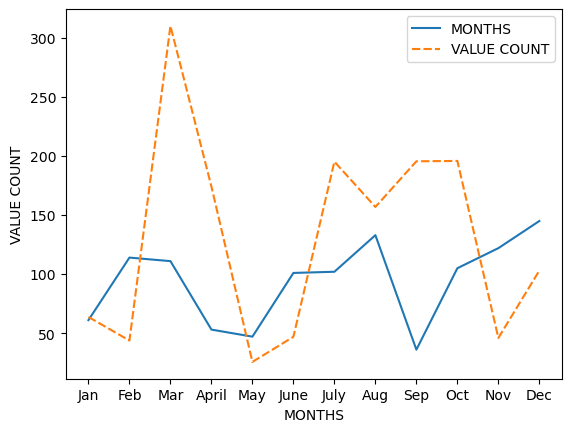

In [57]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0:'Jan', 2.0:'Feb', 3.0:'Mar', 4.0:'April', 5.0:'May',
              6.0: 'June', 7.0:'July', 8.0:'Aug', 9.0:'Sep', 10.0:'Oct',
              11.0:'Nov', 12.0:'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

df = pd.DataFrame({"MONTHS":mon.values, 
                   "VALUE COUNT":dataset.groupby('MONTH', sort = False)
                  ['MILES'].max()})
p = sns.lineplot(data=df)
p.set(xlabel = "MONTHS", ylabel = "VALUE COUNT")

In [58]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs', 4:'Fri', 5:'Sat',
            6:'Sun'}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

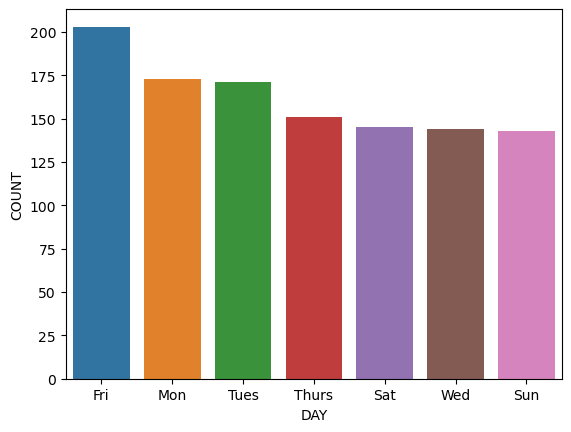

In [59]:
day_label = dataset.DAY.value_counts()
sns.barplot(x = day_label.index, y = day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<AxesSubplot:xlabel='MILES'>

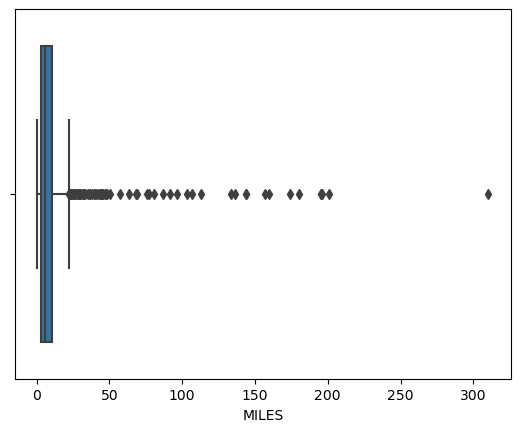

In [61]:
sns.boxplot(data = dataset, x = 'MILES')

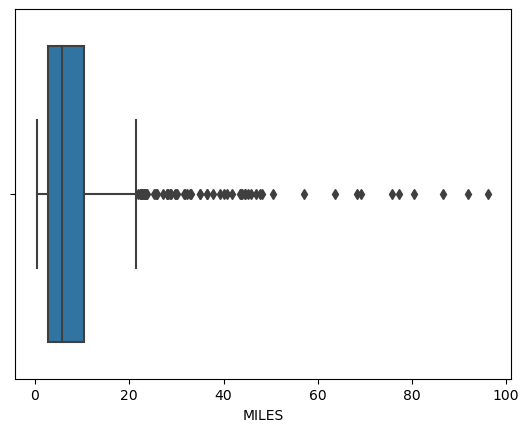

In [68]:
filtered_data = dataset[dataset['MILES'] < 100]

# Create the boxplot with the filtered data
sns.boxplot(data=filtered_data, x='MILES')
plt.show()

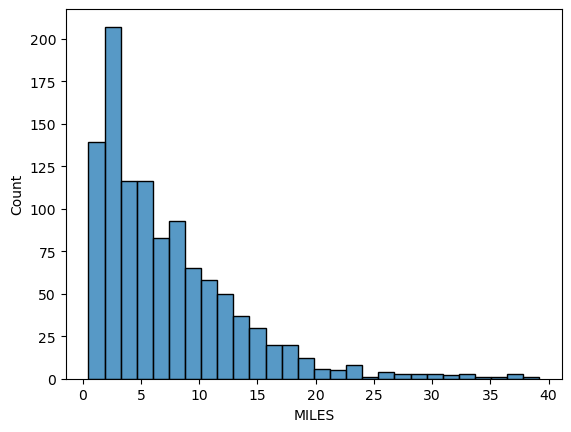

In [76]:
filtered_data = dataset[dataset['MILES'] < 40]

# Create the boxplot with the filtered data
sns.histplot(data = filtered_data, x='MILES')
plt.show()